# Projet Analyse de sentiments - Tweets du Président de la République de 
# de la Côte d'Ivoire - Par Romuald KOUADIO (Data Analyst - AI Developer)

Lien github du projet: https://github.com/RomualdKouadio/Projet-Analyse-de-sentiments

In [1]:
!pip install textblob

In [2]:
!pip install tweepy

In [3]:
!pip install wordcloud

In [4]:
!pip install textblob-fr

In [5]:
# Importer les librairies 
import tweepy 
from textblob import TextBlob
from textblob_fr import PatternTagger, PatternAnalyzer
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [6]:
# Charger les données d'authentification Client de l'API Twitter depuis un fichier excel 
log = pd.read_excel("C:/Users/Romual/Desktop/Login.xlsx")

In [7]:
log.columns

Index(['key1', 'key2', 'key3', 'key4'], dtype='object')

In [8]:
# Twitter API Credentials
consumerKey = log.iloc[0,0]
consumerSecret = log.iloc[0,1]
accessToken = log.iloc[0,2]
accessTokenSecret = log.iloc[0,3]

In [9]:
# Créer l'objet d'authentification
auth = tweepy.OAuthHandler(consumerKey, consumerSecret)

# Parametrer le access token et le access token secret
auth.set_access_token(accessToken, accessTokenSecret)

# Créer l'objet API en transmettant les informations d'authentification
api = tweepy.API(auth, wait_on_rate_limit= True)

In [10]:
# Extraire 100 tweets de l'utilisateur Twitter
posts = api.user_timeline(screen_name= "AOuattara_PRCI", count= 100, tweet_mode="extended")

# Afficher les 5 derniers tweets du compte du PR Alassane Ouattara 
print("Afficher les 5 tweets récents: \n")
i=1
for tweet in posts[0:5]:
    print(str(i) + ") "+ tweet.full_text + "\n")
    i= i+1

Afficher les 5 tweets récents: 

1) Cérémonie d’ouverture du Sommet des Chefs d’Etat et de Gouvernement #COP15 sur la lutte contre la désertification ce lundi 09 mai 2022 au Sofitel Hôtel Ivoire à Abidjan. https://t.co/Atfr0vQwtF

2) Face aux défis de la #désertification, nous devons agir vite. Je me réjouis de la mobilisation  pour le lancement de la #COP15 ainsi que le soutien à « l’Initiative d’Abidjan », qui vise à restaurer nos  écosystèmes forestiers dégradés et à promouvoir la gestion durable des sols. https://t.co/CiDPUaNmt7

3) A travers notre nouvelle Politique forestière, nous faisons la promotion de l’#agroforesterie et faisons appel au secteur privé pour la reconstitution de notre couvert forestier. #COP15Abidan https://t.co/FtAs2OCq5Q

4) Je porte personnellement «l’initiative d’Abidjan », avec l’espoir qu’elle inspirera d'autres pays, en #Afrique et dans le reste du monde. #COP15Abidjan. https://t.co/VyNJakI40V

5) L’impact des phénomènes climatiques sur les terres se po

In [11]:
# Créer un dataframe avec une colonne appelée Tweets dans lequel nous allons ajouter nos tweets
df = pd.DataFrame([tweet.full_text for tweet in posts], columns=['Tweets'])

# Afficher les 5 premières lignes de données
df.head()

,Tweets
0,Cérémonie d’ouverture du Sommet des Chefs d’Et...
1,"Face aux défis de la #désertification, nous de..."
2,"A travers notre nouvelle Politique forestière,..."
3,Je porte personnellement «l’initiative d’Abidj...
4,L’impact des phénomènes climatiques sur les te...


In [12]:
# Nettoyer le texte pour le préparer à l'analyse de sentiment

# Créer une fonction pour nettoyer les tweets
def NettoyerTxt(texte):
    texte = re.sub(r'@[A-Za-z0-9]+', '', texte) # Supprimer les @mentions
    texte = re.sub(r'#', '', texte) # Supprimer les symboles '#'
    texte = re.sub(r'RT[\s]+', '', texte) # Supprimer RT
    texte = re.sub(r'https?:\/\/\S+', '', texte) # Supprimer les liens hyper textes
    
    return texte

# Nettoyage du texte
df['Tweets'] = df['Tweets'].apply(NettoyerTxt)

# Afficher le texte nettoyé
df

,Tweets
0,Cérémonie d’ouverture du Sommet des Chefs d’Et...
1,"Face aux défis de la désertification, nous dev..."
2,"A travers notre nouvelle Politique forestière,..."
3,Je porte personnellement «l’initiative d’Abidj...
4,L’impact des phénomènes climatiques sur les te...
...,...
95,"Retour à Abidjan, ce mardi 22 février 2022, ap..."
96,"De retour à Abidjan après une mission à Accra,..."
97,Lors de nos échanges avec la Pdte du Parlement...
98,"Dans le cadre du SommetUEUA, j’ai participé à ..."


In [13]:
# Enregistrer notre jeu de données 
df.to_csv('Tweets_Ado.csv')

In [14]:
# Créer une fonction pour obtenir la subjectivité
def getSubjectivity(texte):
    return TextBlob(texte,pos_tagger=PatternTagger(),analyzer=PatternAnalyzer()).sentiment[1]

# Créer une fonction pour obtenir la polarité
def getPolarity(texte):
    return TextBlob(texte,pos_tagger=PatternTagger(),analyzer=PatternAnalyzer()).sentiment[0]

# Créer deux nouvelles colonnes
df['Subjectivity'] = df['Tweets'].apply(getSubjectivity)
df['Polarity'] = df['Tweets'].apply(getPolarity)

# Afficher le nouveau dataframe avec les nouvelles colonnes ajoutées 
df

,Tweets,Subjectivity,Polarity
0,Cérémonie d’ouverture du Sommet des Chefs d’Et...,0.000000,0.000000
1,"Face aux défis de la désertification, nous dev...",0.000000,0.000000
2,"A travers notre nouvelle Politique forestière,...",0.216667,0.033333
3,Je porte personnellement «l’initiative d’Abidj...,0.000000,-0.100000
4,L’impact des phénomènes climatiques sur les te...,0.000000,0.000000
...,...,...,...
95,"Retour à Abidjan, ce mardi 22 février 2022, ap...",0.000000,0.000000
96,"De retour à Abidjan après une mission à Accra,...",1.000000,1.000000
97,Lors de nos échanges avec la Pdte du Parlement...,0.000000,0.000000
98,"Dans le cadre du SommetUEUA, j’ai participé à ...",0.150000,-0.135000


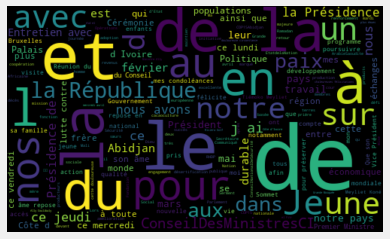

<Figure size 432x288 with 0 Axes>

In [15]:
# Tracer le nuage de mots 'word cloud'
allWords = ' '.join( [twts for twts in df['Tweets']] )
wordCloud = WordCloud(width = 500, height = 300, random_state = 21, max_font_size = 119).generate(allWords)

plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis('off')
plt.show()
plt.savefig(fname='nuage_de_mots')

In [16]:
# Créer une fonction pour calculer l'analyse négative, neutre et positive
def getAnalysis(score):
    if score < 0:
        return 'Negatif'
    elif score == 0:
        return 'Neutre'
    else:
        return 'Positif'

df['Analysis'] = df['Polarity'].apply(getAnalysis)

# Afficher le dataframe
df

,Tweets,Subjectivity,Polarity,Analysis
0,Cérémonie d’ouverture du Sommet des Chefs d’Et...,0.000000,0.000000,Neutre
1,"Face aux défis de la désertification, nous dev...",0.000000,0.000000,Neutre
2,"A travers notre nouvelle Politique forestière,...",0.216667,0.033333,Positif
3,Je porte personnellement «l’initiative d’Abidj...,0.000000,-0.100000,Negatif
4,L’impact des phénomènes climatiques sur les te...,0.000000,0.000000,Neutre
...,...,...,...,...
95,"Retour à Abidjan, ce mardi 22 février 2022, ap...",0.000000,0.000000,Neutre
96,"De retour à Abidjan après une mission à Accra,...",1.000000,1.000000,Positif
97,Lors de nos échanges avec la Pdte du Parlement...,0.000000,0.000000,Neutre
98,"Dans le cadre du SommetUEUA, j’ai participé à ...",0.150000,-0.135000,Negatif


In [17]:
# Afficher tous les tweets positifs du PR
l = 1
sortedDF = df.sort_values(by=['Polarity'])
for i in range(0, sortedDF.shape[0]):
    if(sortedDF['Analysis'][i] == 'Positif'):
        print(str(l) + ') ' + sortedDF['Tweets'][i])
        print()
        l = l+1

1) A travers notre nouvelle Politique forestière, nous faisons la promotion de l’agroforesterie et faisons appel au secteur privé pour la reconstitution de notre couvert forestier. COP15Abidan 

2) Agissons vite, agissons ensemble pour donner une nouvelle vie à nos terres ! COP15Abidjan 

3) La Cote d’Ivoire est fière d’accueillir la COP15 contre la désertification du 9 mai au 20 mai à Abidjan. 

Avec les leaders du monde entier et de l’, nous prendrons des engagements forts  pour préserver &amp; restaurer nos terres.

Ensemble à AbidjanCOP15 ! 

4) La Côte d’Ivoire perd un valeureux fils, un homme de conviction et de devoir. Je perds un fidèle compagnon, un ami loyal et dévoué. 

En cette douloureuse circonstance, je présente mes  condoléances les plus émues à sa famille et à ses proches. 

Que son âme repose en paix.

5) Mes chers compatriotes, 
J’ai la profonde douleur de vous annoncer le décès, ce samedi 7 mai 2022, du Président de l’Assemblée Nationale, mon jeune frère, Amadou Sou

In [18]:
# Afficher tous les tweets neutres du PR
l = 1
sortedDF = df.sort_values(by=['Polarity'])
for i in range(0, sortedDF.shape[0]):
    if(sortedDF['Analysis'][i] == 'Neutre'):
        print(str(l) + ') ' + sortedDF['Tweets'][i])
        print()
        l = l+1

1) Cérémonie d’ouverture du Sommet des Chefs d’Etat et de Gouvernement COP15 sur la lutte contre la désertification ce lundi 09 mai 2022 au Sofitel Hôtel Ivoire à Abidjan. 

2) Face aux défis de la désertification, nous devons agir vite. Je me réjouis de la mobilisation  pour le lancement de la COP15 ainsi que le soutien à « l’Initiative d’Abidjan », qui vise à restaurer nos  écosystèmes forestiers dégradés et à promouvoir la gestion durable des sols. 

3) L’impact des phénomènes climatiques sur les terres se pose avec acuité en Côte d’Ivoire. COP15Abidjan 

4) Entretien avec Son Éminence le Cardinal Pietro Parolin, Secrétaire d'Etat du Saint-Siège, ce vendredi 06 mai 2022 au Palais de la Présidence de la République. 

5) Entretien avec _adesina, Président de la BAD, ce jeudi 05 mai 2022 au Palais de la Présidence de la République 

6) La journée mondiale du Patrimoine africain, nous offre l’occasion de mettre en lumière nos 5 sites emblématiques inscrits au patrimoine mondial de l’UNE

In [19]:
# Afficher tous les tweets negatifs du PR
l = 1
sortedDF = df.sort_values(by=['Polarity'], ascending='False')
for i in range(0, sortedDF.shape[0]):
    if(sortedDF['Analysis'][i] == 'Negatif'):
        print(str(l) + ') ' + sortedDF['Tweets'][i])
        print()
        l = l+1

1) Je porte personnellement «l’initiative d’Abidjan », avec l’espoir qu’elle inspirera d'autres pays, en Afrique et dans le reste du monde. COP15Abidjan. 

2) : Entre 2015 et 2020, l’accès à l’eau potable est passé de 65% à 82% sur l’étendue du territoire national. Le PSGouv permet…

3) Cérémonie Solennelle de Prestation de Serment du Vice-Président de la République, ce mercredi 20 avril 2022 PrestationdeSermentVP 

4) Suivez, en direct du Palais de la Présidence de la République, la Cérémonie Solennelle de Prestation de Serment du Vice-président, ce mercredi 20 avril 2022



5) Je me félicite de l’adoption, le 30 mars dernier, en ConseilDesMinistresCI, de la Politique et de la Stratégie nationale pour une cacaoculture durable basée sur l’amélioration des revenus de nos producteurs, la lutte contre la déforestation et le travail des enfants.

6) Le mois de mars a été marqué par le renforcement de nos relations diplomatiques, la diversification de notre économie ainsi que la prise de me

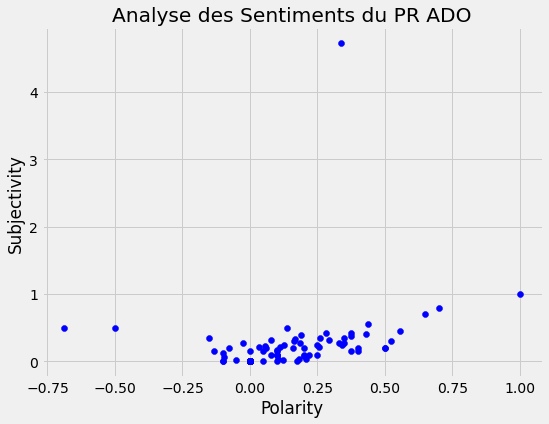

<Figure size 432x288 with 0 Axes>

In [20]:
# Tracer la polarité et la subjectivité
plt.figure(figsize=(8,6))
for i in range(0, df.shape[0]):
    plt.scatter(df['Polarity'][i], df['Subjectivity'][i], color = 'Blue')
    
plt.title('Analyse des Sentiments du PR ADO')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()
plt.savefig('Visualisation_Polarité_Subjectivité')

In [21]:
# Obtenir le pourcentage de tweets positifs
tweets_positifs = df[df.Analysis == 'Positif']
tweets_positifs = tweets_positifs['Tweets']

round( (tweets_positifs.shape[0] / df.shape[0]) * 100, 1)

55.0

In [22]:
# Obtenir le pourcentage de tweets neutres 
tweets_neutres = df[df.Analysis == 'Neutre']
tweets_neutres = tweets_neutres['Tweets']

round( (tweets_neutres.shape[0] / df.shape[0]) * 100, 1)

34.0

In [23]:
# Obtenir le pourcentage de tweets négatifs
tweets_negatifs = df[df.Analysis == 'Negatif']
tweets_negatifs = tweets_negatifs['Tweets']

round( (tweets_negatifs.shape[0] / df.shape[0]) * 100, 1)

11.0

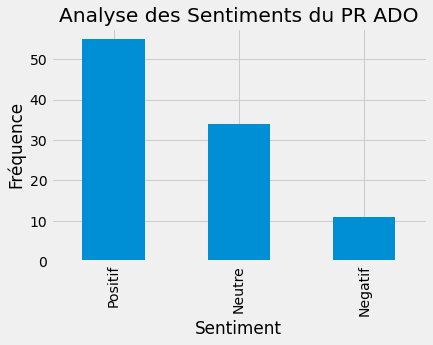

<Figure size 432x288 with 0 Axes>

In [24]:
# Afficher les fréquences 

df['Analysis'].value_counts()

# Tracer et visualiser les fréquences de tweets par sentiment
plt.title('Analyse des Sentiments du PR ADO')
plt.xlabel('Sentiment')
plt.ylabel('Fréquence')
df['Analysis'].value_counts().plot(kind='bar')
plt.show()
plt.savefig('Resultats_Analyse')

In [25]:
# Sauvegarde des résultats
df.to_csv('PrAdo_Sentiment_Analysis.csv')